In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
#gives the shape of the data 
df.shape

(1460, 81)

In [4]:
#gives the first few values of the data 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


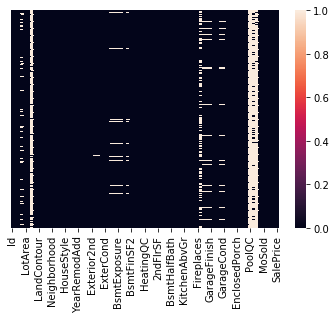

In [5]:
# shows a heatmap of the data with null values separated out in yellow color
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [6]:
#gives info about the data - # of null records per column & type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Lists column names by data type - Integars and Objects
g = df.columns.to_series().groupby(df.dtypes).groups
print(g)

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object'), dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'), dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', '

In [8]:
#count the number of null values in each column
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<BarContainer object of 81 artists>

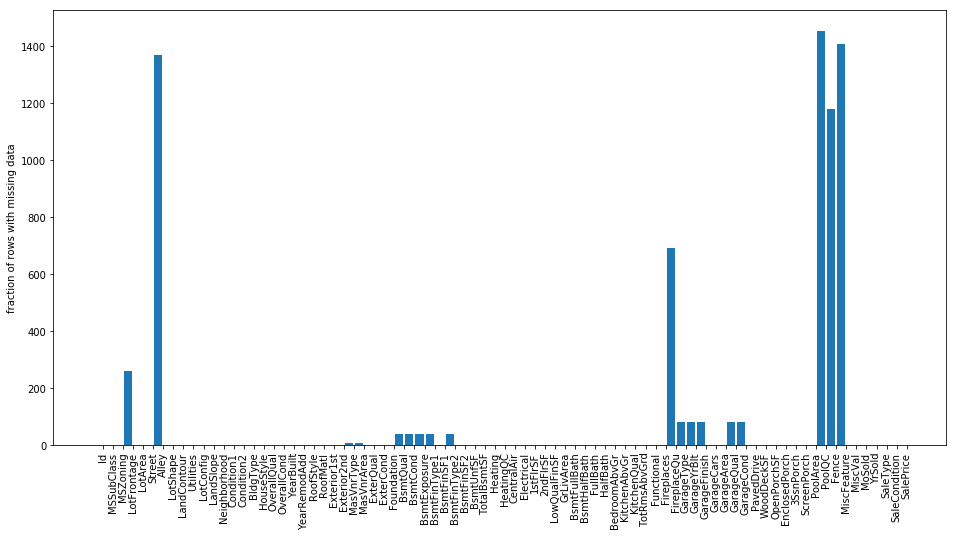

In [9]:
# plots the columns with null values. Number of null values on y-axis and column headers in x-axis
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [10]:
# Replaxe null values with Mean of LotFrontage
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
#df.head()

In [11]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
#drops some columns - columns with too many null values - number of columns fall by 3 (from 81 to 78)
df.drop(['Alley', 'PoolQC', 'Fence'],axis=1,inplace=True)
df.shape

(1460, 78)

In [13]:
#replaces all the null values with the mode since the data type is a categorical value
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [14]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [15]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [16]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])      
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])  
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])   
df.shape

(1460, 78)

In [17]:
# Fill missing values of GarageYrBuilt with corresponding values from YearBuilt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [18]:
# axis=1 when you want to refer to a column. Drop another column with too many null values 
df.drop(['MiscFeature'],axis=1,inplace=True)
df.shape

(1460, 77)

In [19]:
df['Fireplaces']=df['Fireplaces'].fillna(df['Fireplaces'].mode()[0]) 

In [20]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0]) 

<BarContainer object of 77 artists>

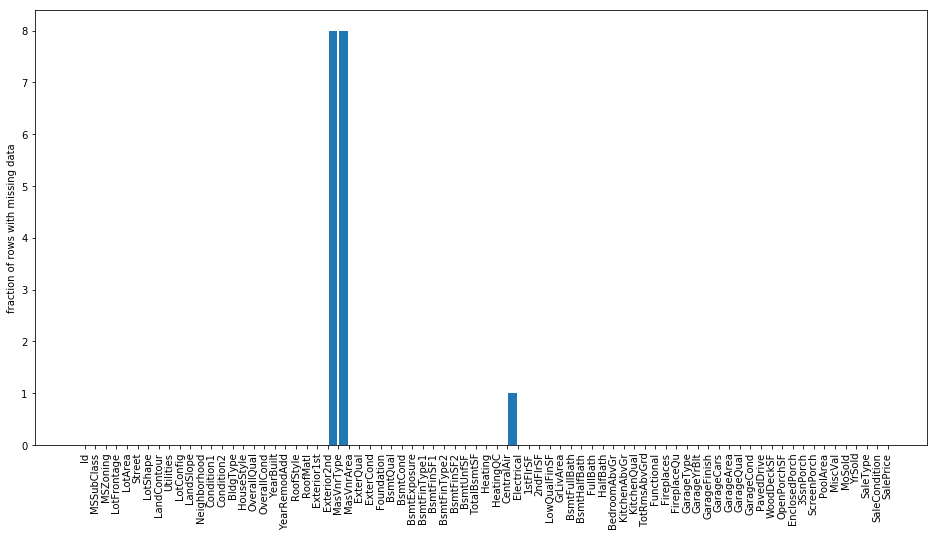

In [21]:
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [22]:
#gives info about the data - we are looking to see if null values remain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [23]:
#drops the 'Id' column 
df.drop(['Id'],axis=1,inplace=True)
df.shape

(1460, 76)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [25]:
# Drop all rows with zero values - 1460 rows come down to 1451  
#df = df.dropna(how ='any',axis=0) 
#df.shape

<BarContainer object of 76 artists>

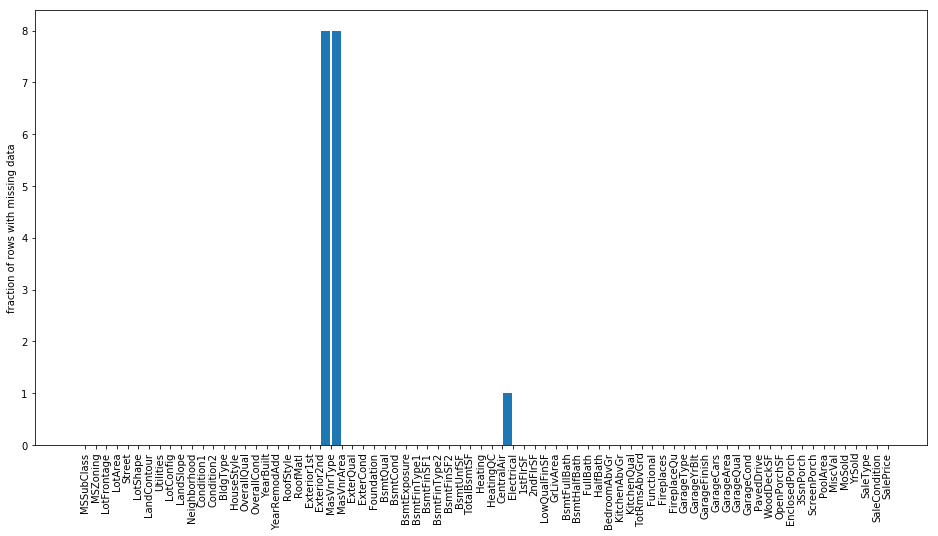

In [26]:
#count and graphs the number of null values
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

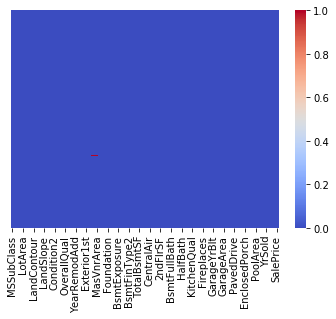

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True, cmap='coolwarm')

In [28]:
#Handle Categorical Features
#list(df.columns)
#df.info()
#df._get_numeric_data()
#df.select_dtypes(include=['int']).dtypes
col = df.select_dtypes(include=['object'])
#df.select_dtypes(include=['float'])
list(col)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [29]:
# Assigning column names with categorical features to a variable called "columns'
columns=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [30]:
#tells me how many colums there are with categorical values 
len(columns)

39

In [31]:
# Defining a function to convert all categorical values into numerical values. 
# Using the method of One Hot Encoding, create dummy columns for each categorical value using pd.get_dummies function
# Create 

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:     
        print(fields)
        
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
          
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [32]:
# Creating a copy of df to ensure any changes can be tracked back
main_df=df.copy()

In [33]:
df.shape

(1460, 76)

In [34]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [35]:
# Reading the test data file, that has been transformed and saved in kaggle notebook - kernel2dc1902644  - TEST DATA
test_df = pd.read_csv('../input/retestdata0522/reformulated_test.csv')

In [36]:
test_df.shape
#test_df.head()

(1459, 75)

In [37]:
# Concatinating test and train date across rows - 1434 + 1451 = 2885 rows and 76 columns should be the result
final_df=pd.concat([df,test_df],axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [38]:
#tells me the number of rows and columns and the data 
final_df.shape
#final_df.info()

(2919, 76)

In [39]:
# Checking to see where test and train data merge 
final_df.iloc[1440:1470]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1440,1423,748,0,3,1Fam,TA,No,0.0,0.0,Unf,...,WD,0,Pave,11,588.0,AllPub,431,1922,1994,2008
1441,848,0,0,1,TwnhsE,TA,Av,697.0,0.0,GLQ,...,WD,0,Pave,3,848.0,AllPub,149,2004,2004,2008
1442,1026,981,0,3,1Fam,TA,Av,765.0,0.0,GLQ,...,WD,0,Pave,10,1017.0,AllPub,168,2008,2008,2009
1443,952,0,0,2,1Fam,TA,No,0.0,0.0,Unf,...,WD,40,Pave,4,952.0,AllPub,0,1916,1950,2009
1444,1422,0,0,3,1Fam,TA,Av,0.0,0.0,Unf,...,WD,0,Pave,7,1422.0,AllPub,192,2004,2004,2007
1445,913,0,0,3,1Fam,TA,Gd,187.0,627.0,LwQ,...,WD,0,Pave,6,814.0,AllPub,0,1966,1966,2007
1446,1188,0,0,3,1Fam,TA,No,593.0,0.0,Rec,...,WD,0,Pave,6,1188.0,AllPub,261,1962,1962,2010
1447,1220,870,0,3,1Fam,TA,No,1079.0,0.0,GLQ,...,WD,0,Pave,8,1220.0,AllPub,0,1995,1996,2007
1448,796,550,0,2,1Fam,TA,No,0.0,0.0,Unf,...,WD,0,Pave,6,560.0,AllPub,168,1910,2000,2007
1449,630,0,0,1,Twnhs,TA,Av,553.0,0.0,GLQ,...,WD,0,Pave,3,630.0,AllPub,0,1970,1970,2006


In [40]:
final_df.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006
1458,996,1004,0,3,1Fam,TA,Av,758.0,0.0,LwQ,...,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006


In [41]:
# Checking 76 columns to confirm "SalePrice" is included. It should be part of train data but not test data
final_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

In [42]:
# Call the One Hot Multcols function and pass it all categorical columns listed earlier under variable "columns"
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [43]:
# Final data frame now has 237 columns - one column for each categorical value of each column
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 237 entries, 1stFlrSF to Partial
dtypes: float64(12), int64(25), uint8(200)
memory usage: 1.4 MB


In [44]:
# Remove any  duplicate columns 
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [45]:
# # of columns come down to 177
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 177 entries, 1stFlrSF to Partial
dtypes: float64(12), int64(25), uint8(140)
memory usage: 1.2 MB


In [46]:
final_df
final_df.iloc[1450:1470]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1450,896,896,0,4,0.0,0.0,0.0,0.0,896.0,0,...,0,0,0,0,1,0,0,0,1,0
1451,1578,0,0,3,0.0,0.0,0.0,0.0,1573.0,0,...,0,0,1,0,0,0,0,0,0,1
1452,1072,0,0,2,547.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1453,1140,0,0,3,0.0,0.0,0.0,0.0,1140.0,0,...,0,0,0,0,1,0,0,0,0,0
1454,1221,0,0,2,410.0,0.0,1.0,0.0,811.0,0,...,0,0,0,0,1,0,0,0,1,0
1455,953,694,0,3,0.0,0.0,0.0,0.0,953.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,0,...,0,0,0,0,1,0,0,0,1,0
1457,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,0,...,0,0,0,0,1,0,0,0,1,0
1458,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,112,...,0,0,0,0,1,0,0,0,1,0
1459,1256,0,0,3,830.0,290.0,1.0,0.0,136.0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
# Dividing the dataframe into training and test data frame
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

<BarContainer object of 177 artists>

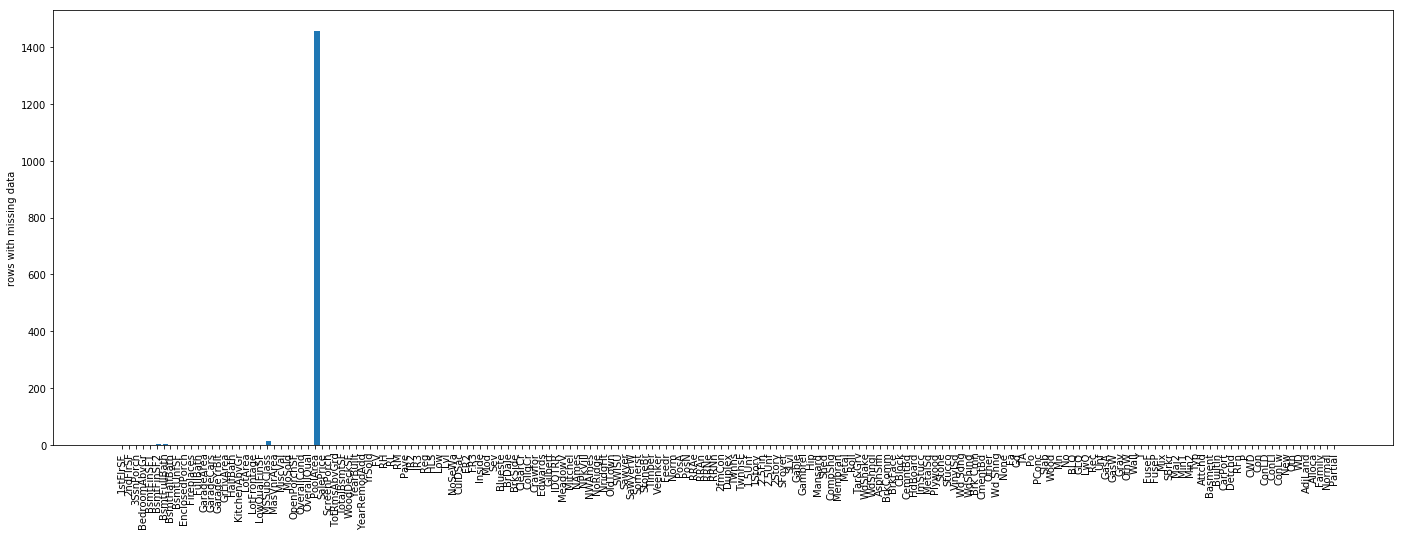

In [48]:
# Checking to see df_Test has 'SalePrice'with all null values - thereby confirming the right division of final_df into test and train
null_counts = df_Test.isnull().sum()
plt.figure(figsize=(24,8))
plt.xticks(np.arange(len(null_counts))+0.75,null_counts.index,rotation='vertical')
plt.ylabel('rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<BarContainer object of 177 artists>

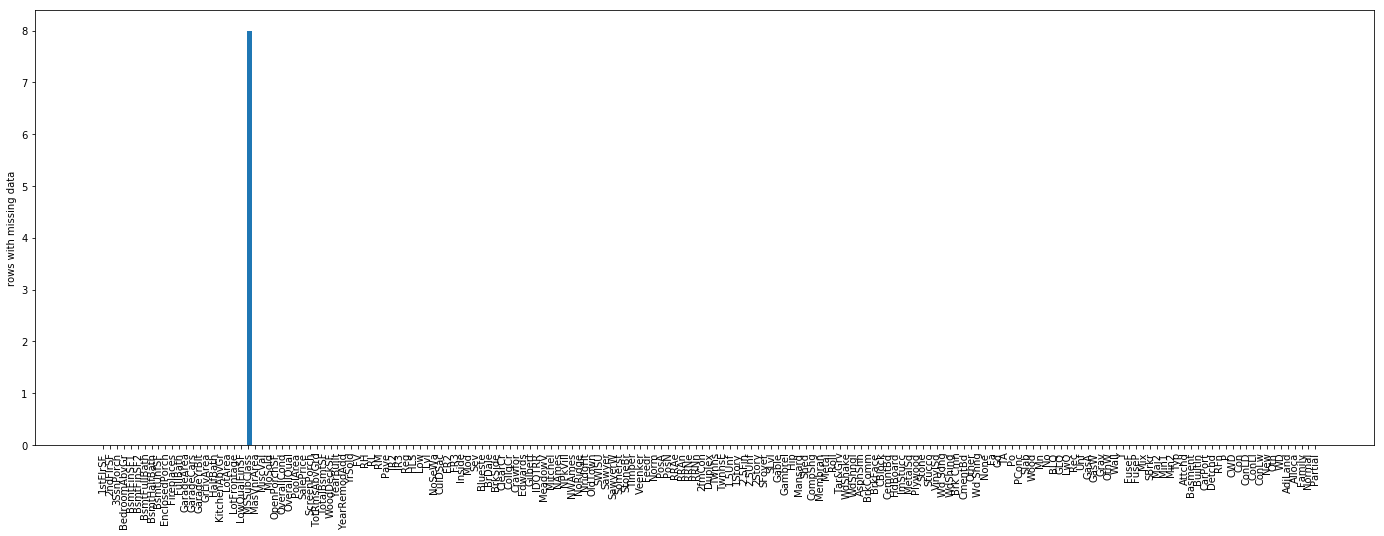

In [49]:
# Checking to see df_Train.. clearly no column with 1400+ null values 
null_counts = df_Train.isnull().sum()
plt.figure(figsize=(24,8))
plt.xticks(np.arange(len(null_counts))+0.75,null_counts.index,rotation='vertical')
plt.ylabel('rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [50]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df_Train.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1455,953,694,0,3,0.0,0.0,0.0,0.0,953.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,0,...,0,0,0,0,1,0,0,0,1,0
1457,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,0,...,0,0,0,0,1,0,0,0,1,0
1458,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,112,...,0,0,0,0,1,0,0,0,1,0
1459,1256,0,0,3,830.0,290.0,1.0,0.0,136.0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [53]:
df_Test.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=177)

In [54]:
df_Train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=177)

In [55]:
len(df_Test.columns)

177

In [56]:
len(df_Train.columns)

177

In [57]:
df_Test['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [58]:
df_Train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [59]:
df_Test.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,1,0,0,0,1,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,1,0,0,0,0,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,1,0,0,0,1,0
1458,996,1004,0,3,758.0,0.0,0.0,0.0,238.0,0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
df_Test.shape

(1459, 177)

In [61]:
df_Train.shape

(1460, 177)

In [62]:
# Dropping the SalePrice column in df_Test as all values are null
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
df_Test.shape

(1459, 176)

In [64]:
df_Train.shape

(1460, 177)

In [65]:
# Dividing df_Train into X_train and Y_Train.
# In X_train, we drop SalesPrice and Y_Train has only SalePrice as a column
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [66]:
# Importing the XGBoost algorithm and using it to fit X_train and y_train
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [67]:
df_Test.shape

(1459, 176)

In [68]:
# Using the trained claasifier to predict SalePrice for df_TEst
y_pred=classifier.predict(df_Test)

In [69]:
y_pred

array([120704.71, 153933.83, 185346.88, ..., 166703.22, 115600.64,
       232392.64], dtype=float32)

In [70]:
y_pred.shape

(1459,)

In [71]:
# Creating submission file. File will be in Kaggle / Data / Output

pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets
#datasets = datasets.iloc[:1459,:]
#datasets['Id'] = datasets['Id'].astype('int32') 
datasets.to_csv('Seventh_sample_submission.csv',index=False)
#datasets.tail(30)

In [72]:
datasets.shape

(1459, 2)

HYPERPARAMETER TUNING*****

In [73]:
# Import RandomizedSearchCV to find the best Regressor for the data set.
from sklearn.model_selection import RandomizedSearchCV

In [74]:
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
random_cv = RandomizedSearchCV (estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter= 70,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [75]:
# Using the regressor with the parameters derived by RandomCV
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [76]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [77]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [78]:
df_Test.shape

(1459, 176)

In [79]:
# Using regressor to predict df_Test 
y_pred=regressor.predict(df_Test)

In [80]:
y_pred

array([117835.164, 161960.08 , 184877.81 , ..., 174990.83 , 119983.69 ,
       238655.81 ], dtype=float32)

In [81]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
#datasets = datasets.iloc[:1459,:]
#datasets['Id'] = datasets['Id'].astype('int32') 
datasets.to_csv('Tuned_Fifth_sample_submission.csv',index=False)
pred

,0
0,117835.164062
1,161960.078125
2,184877.812500
3,195568.218750
4,198507.359375
...,...
1454,84161.437500
1455,65697.023438
1456,174990.828125
1457,119983.687500


In [82]:
# Assign SalePrice as name of column
pred.columns=['SalePrice']
pred

,SalePrice
0,117835.164062
1,161960.078125
2,184877.812500
3,195568.218750
4,198507.359375
...,...
1454,84161.437500
1455,65697.023438
1456,174990.828125
1457,119983.687500


In [83]:
df_Train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=177)

In [84]:
# temp_df copied with values from df_train (SalePrice)
temp_df=df_Train['SalePrice'].copy()

In [85]:
temp_df.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [86]:
# Assign column name "SalePrice"
temp_df.column=['SalePrice']

In [87]:
temp_df.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [88]:
temp_df.shape

(1460,)

In [89]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [90]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
df_Train.shape

(1460, 176)

In [92]:
# Add temp_df to df_Train - ie. add SalePrice column to df_Train
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [93]:
df_Train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [94]:
df_Train.shape

(1460, 177)

In [95]:
df_Test.shape

(1459, 176)

In [96]:
# Add predicted values of SalePrice to df_Test
df_Test=pd.concat([df_Test,pred],axis=1)

In [97]:
df_Test.shape

(1459, 177)

In [98]:
# Create df_Train combining df_Train and df_Test. Df_Train now has 2919 rows for model fitment
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [99]:
df_Train.shape

(2919, 177)

In [100]:
# Create X_train and Y_Train for training model - this time with 2919 rows 
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [101]:
X_train.shape

(2919, 176)

In [102]:
y_train

0       208500.000000
1       181500.000000
2       223500.000000
3       140000.000000
4       250000.000000
            ...      
1454     84161.437500
1455     65697.023438
1456    174990.828125
1457    119983.687500
1458    238655.812500
Name: SalePrice, Length: 2919, dtype: float64

In [103]:
# Using CVbest Estimator for regressor 
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [104]:
# Using Regressor to fit X_train and Y-Train
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [105]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [106]:
df_Test.shape

(1459, 176)

In [107]:
# Using regressor to predict SalePrice values of df_Test
y_pred=regressor.predict(df_Test)

In [108]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
#datasets = datasets.iloc[:1459,:]
#datasets['Id'] = datasets['Id'].astype('int32') 
datasets.to_csv('Mashup_sample_submission.csv',index=False)
datasets

,Id,SalePrice
0,1461,118777.554688
1,1462,161085.406250
2,1463,185401.468750
3,1464,192482.968750
4,1465,192102.265625
...,...,...
1454,2915,84507.781250
1455,2916,65677.437500
1456,2917,175836.609375
1457,2918,122607.921875


**PREDICTION MODELING USING KERAS**

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 176))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss= 'mean_squared_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

ann_pred=classifier.predict(df_Test)

df_pred = ann_pred

df_pred.shape

pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets = datasets.iloc[:1459,:]
datasets['Id'] = datasets['Id'].astype('int32') 
datasets.to_csv('Tuned_First_ANN_sample_submission.csv',index=False)
datasets.head(30)

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))